### Import Packages and define some functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from mlxtend.data import loadlocal_mnist

def plot_confusion_matrix(tn,fp,fn,tp):
    pred = ["predicted 0", "predicted 1"]
    real = ["real 0", "real 1"]

    mat = np.array([[tn,fp],
                    [fn,tp]])
    conf_mat = np.array([["true negatives","false positives"],
                         ["false negatives","true positives"]])


    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(mat, cmap="seismic")

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(pred)))
    ax.set_yticks(np.arange(len(real)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(pred)
    ax.set_yticklabels(real)

    ax.set_xlim([-0.5,1.5])
    ax.set_ylim([-0.5,1.5])

    # Loop over data dimensions and create text annotations.
    for i in range(len(pred)):
        for j in range(len(real)):
            text = ax.text(j, i, mat[i][j],
                           ha="center", va="center", color="w", fontsize=20)
            
    for i in range(len(pred)):
        for j in range(len(real)):
            text = ax.text(j, i-0.4, conf_mat[i][j],
                           ha="center", va="center", color="gray", fontsize=20)
            

    ax.set_title("Confusion Matrix", fontsize=20)
    fig.tight_layout()
    plt.show()

def conf_matrix(y_proba, y_real, threshold=0.5, plot=False):
    y_pred = np.where(y_proba>threshold, 1, 0)
    df = pd.DataFrame({"y_real":y_real, "y_proba":y_proba, "y_pred":y_pred})
    
    tp = df[(df["y_real"]==df["y_pred"]) & (df["y_real"]==1)].shape[0]
    tn = df[(df["y_real"]==df["y_pred"]) & (df["y_real"]==0)].shape[0]
    fp = df[(df["y_real"]!=df["y_pred"]) & (df["y_pred"]==1)].shape[0]
    fn = df[(df["y_real"]!=df["y_pred"]) & (df["y_pred"]==0)].shape[0]
    
    if plot:
        plot_confusion_matrix(tn,fp,fn,tp)
        return
    return tn,fp,fn,tp

def plot_metric_to_threshold(threshold, metric, metric_name):
    fig, ax = plt.subplots(figsize=(10,7))
    ax.plot(threshold,metric)
        
    ax.set_xticks(np.round(np.arange(0,1.1,0.1),1))
    ax.set_yticks(np.round(np.arange(0,1.1,0.1),1))
        
    ax.set_xticklabels(np.round(np.arange(0,1.1,0.1),1), size=12)
    ax.set_yticklabels(np.round(np.arange(0,1.1,0.1),1), size=12)
    ax.set_xlabel("Threshold", fontsize=20)
    ax.set_ylabel(metric_name, fontsize=20)
        
    ax.set_xlim([-0.01,1.01])
    ax.set_ylim([-0.01,1.01])
    plt.grid()
    plt.show()

### Load MNIST Dataset

In [2]:
X, y = loadlocal_mnist(
        images_path='t10k-images-idx3-ubyte', 
        labels_path='t10k-labels-idx1-ubyte')

In [20]:
y[2]

1

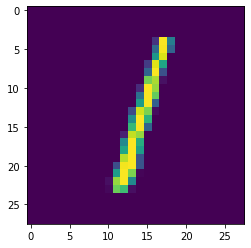

In [19]:
from matplotlib import pyplot as plt
plt.imshow(X[2].reshape(28,28), )

### Make Multilayer Perceptron Classifier for MNIST Dataset

In [130]:
#split up the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
lr.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [132]:
lr.score(X_test,y_test)

0.8545

In [49]:
# define mulitlayer perceptron classifier
clf = MLPClassifier(hidden_layer_sizes=(100,50,20,), random_state=42)
# fit the classifier
clf.fit(X_train,y_train)
# predict class probabilities
y_pred = clf.predict_proba(X_test)
# take maximum value of predicted probabilites
corr_clsfd_img = (np.argmax(y_pred, axis=1)==y_test).sum()
# compare to actual value
perc_corr_clsfd_img = np.round(corr_clsfd_img/y_pred.shape[0],2)
print(f"Correctly classified images: {perc_corr_clsfd_img}%")

Correctly classified images: 0.93%


In [50]:
y_pred[911].round(2)

array([0.  , 0.  , 0.  , 0.  , 0.95, 0.  , 0.  , 0.  , 0.  , 0.05])

In [51]:
y_test[911]

4

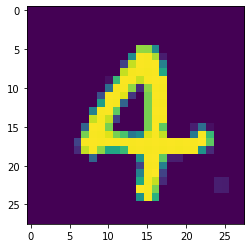

In [52]:
plt.imshow(X_test[911].reshape(28,28),)

### Transform Problem into a binary classification task
#### Model to answer question: does image show value 5 or above?

In [99]:
# create a balanced dataset
#y_bin = np.array([0 if y_bin=9 else 1 for y_bin in y])

# create a skewed dataset
y_bin = np.array([0 if y_bin!=9 else 1 for y_bin in y])

In [100]:
#split up the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.33, random_state=42)

In [101]:
# define mulitlayer perceptron classifier
clf = MLPClassifier(hidden_layer_sizes=(10,8,5,), max_iter=50, random_state=42)
# fit the classifier
clf.fit(X_train,y_train)
y_proba = clf.predict_proba(X_test)[:,1]
# take maximum value of predicted probabilites
corr_clsfd_img = (np.round(y_proba,0)==y_test).sum()
# compare to actual value
perc_corr_clsfd_img = np.round(corr_clsfd_img/y_proba.shape[0],2)
print(f"Correctly classified images: {perc_corr_clsfd_img}%")

Correctly classified images: 0.97%


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [61]:
y_proba[1]

0.180079367848283

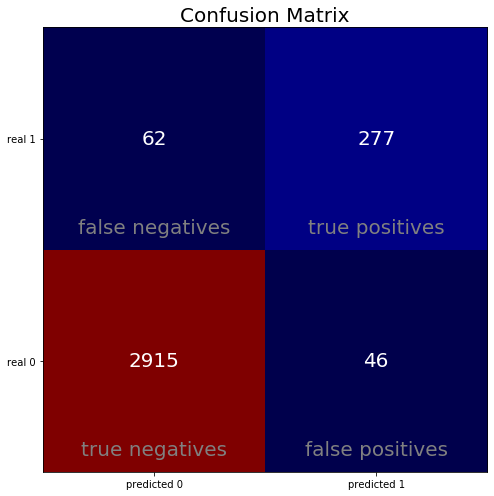

In [102]:
conf_matrix(y_proba, y_test, threshold=0.5, plot=True)

## False positive rate  - Type I error 
$ \text{FPR} = \frac{\text{fp}}{\text{fp}+\text{tn}} $  -> how many false alerts do we have due to our model

In [103]:
def fpr(y_proba, y_test, plot=True):
    fpr = []
    threshold = []
    for t in np.linspace(0,1,500):
        tn,fp,fn,tp = conf_matrix(y_proba, y_test, threshold=t, plot=False)
        fpr.append(fp/(fp+tn))
        threshold.append(t)
    
    if plot:
        plot_metric_to_threshold(threshold, fpr, "False Positive Rate")
        return
    return threshold, fpr

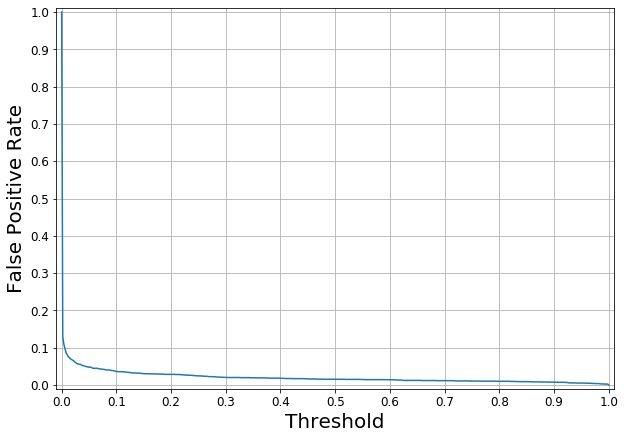

In [104]:
fpr(y_proba, y_test, plot=True)

## False Negative Rate - Type II error
$ \text{FNR} = \frac{\text{fn}}{\text{fn}+\text{tp}} $ -> fraction of missed images above 5

In [105]:
def fnr(y_proba, y_test, plot=True):
    fnr = []
    threshold = []
    for t in np.linspace(0,1,500):
        tn,fp,fn,tp = conf_matrix(y_proba, y_test, threshold=t, plot=False)
        fnr.append(fn/(fn+tp))
        threshold.append(t)
    
    if plot:
        plot_metric_to_threshold(threshold, fnr, "False Negative Rate")
        return
    return threshold, fnr

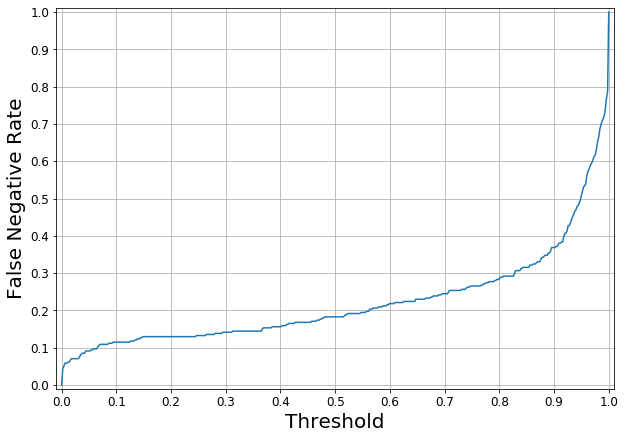

In [106]:
fnr(y_proba, y_test, plot=True)

## True Negative Rate - Specificity
$ \text{TNR} = \frac{\text{tn}}{\text{tn}+\text{fp}} $ -> fraction of predicted <5 of all real <5 images

In [107]:
def tnr(y_proba, y_test, plot=True):
    tnr = []
    threshold = []
    for t in np.linspace(0,1,500):
        tn,fp,fn,tp = conf_matrix(y_proba, y_test, threshold=t, plot=False)
        tnr.append(tn/(tn+fp))
        threshold.append(t)
    
    if plot:
        plot_metric_to_threshold(threshold, tnr, "True Negative Rate")
        return
    return threshold, tnr

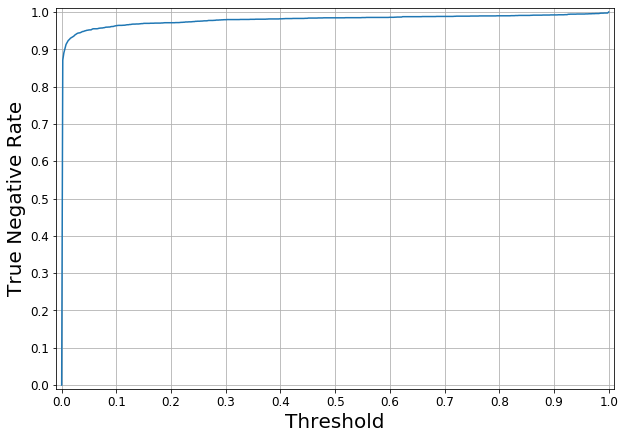

In [108]:
tnr(y_proba, y_test, plot=True)

## Negative Predictive Value
$ \text{NPV} = \frac{\text{tn}}{\text{tn}+\text{fn}} $ -> ratio of good predictions of images <5 in all our predictions of images <5

In [109]:
def npv(y_proba, y_test, plot=True):
    npv = []
    threshold = []
    for t in np.linspace(0,1,500):
        tn,fp,fn,tp = conf_matrix(y_proba, y_test, threshold=t, plot=False)
        npv.append((tn+0.01)/(tn+fn+0.01))
        threshold.append(t)
    
    if plot:
        plot_metric_to_threshold(threshold, npv, "Negative Prdictive Value")
        return
    return threshold, npv

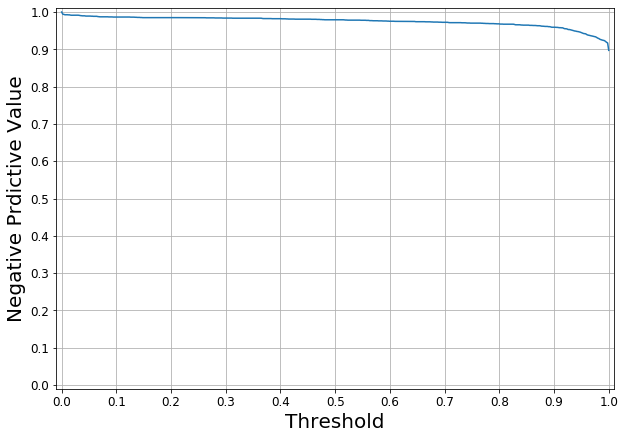

In [110]:
npv(y_proba, y_test, plot=True)

## False Discovery Rate
$ \text{FDR} = \frac{\text{fp}}{\text{fp}+\text{tp}} $ -> of all the predicted >5 images how many of them did we classify wrong

In [111]:
def fdr(y_proba, y_test, plot=True):
    fdr = []
    threshold = []
    for t in np.linspace(0,1,500):
        tn,fp,fn,tp = conf_matrix(y_proba, y_test, threshold=t, plot=False)
        fdr.append((fp)/(tp+fp+0.01))
        threshold.append(t)

    if plot:
        plot_metric_to_threshold(threshold, fdr, "False Discovery Rate")
        return
    return threshold, fdr

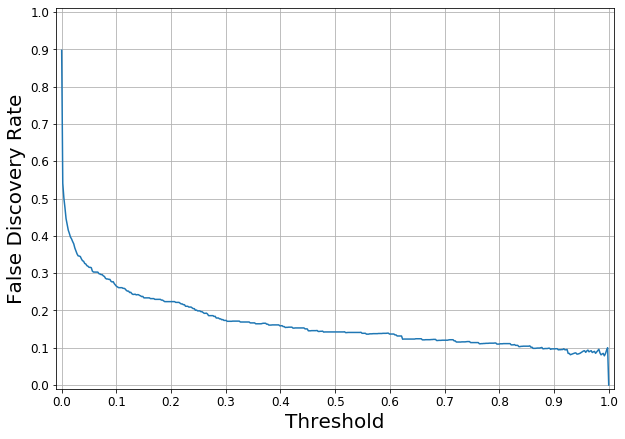

In [112]:
fdr(y_proba, y_test, plot=True)

## True Positive Rate - Recall - Sensitivity
$ \text{TPR} = \frac{\text{tp}}{\text{tp}+\text{fn}} $ -> how many of the real >5 images did we correctly mark as such (recall)

In [113]:
def tpr(y_proba, y_test, plot=True):
    tpr = []
    threshold = []
    for t in np.linspace(0,1,500):
        tn,fp,fn,tp = conf_matrix(y_proba, y_test, threshold=t, plot=False)
        tpr.append((tp)/(tp+fn))
        threshold.append(t)

    if plot:
        plot_metric_to_threshold(threshold, tpr, "True Positive Rate")
        return
    return threshold, tpr

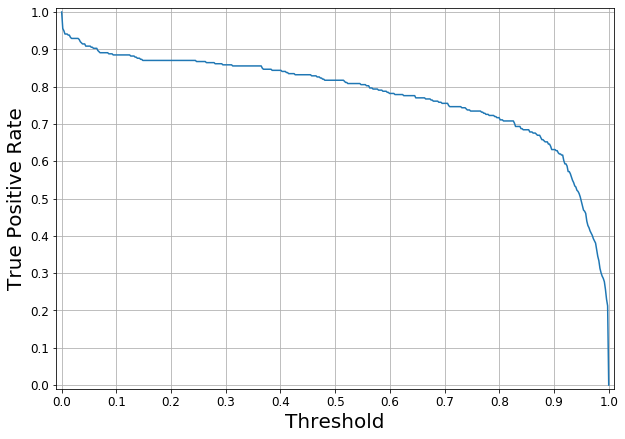

In [114]:
tpr(y_proba, y_test, plot=True)

## Positive Predictive Value - Precision
$ \text{PPV} = \frac{\text{tp}}{\text{tp}+\text{fp}} $ -> how many of our positive predictions were correct

In [115]:
def ppv(y_proba, y_test, plot=True):
    ppv = []
    threshold = []
    for t in np.linspace(0,1,500):
        tn,fp,fn,tp = conf_matrix(y_proba, y_test, threshold=t, plot=False)
        ppv.append((tp+0.01)/(tp+fp+0.01))
        threshold.append(t)

    if plot:
        plot_metric_to_threshold(threshold, ppv, "Positive Predictive Value")
        return
    return threshold, ppv

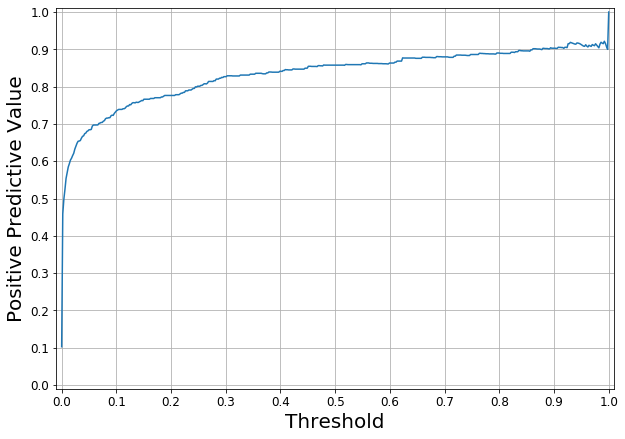

In [116]:
ppv(y_proba, y_test, plot=True)

## Accuracy
$ \text{ACC} = \frac{\text{tp+tn}}{\text{tp+tn+fp+tn}} $ -> how many were correctly classifier

In [117]:
def acc(y_proba, y_test, plot=True):
    acc = []
    threshold = []
    for t in np.linspace(0,1,500):
        tn,fp,fn,tp = conf_matrix(y_proba, y_test, threshold=t, plot=False)
        acc.append((tp+tn)/(tp+fp+tn+fn))
        threshold.append(t)

    if plot:
        plot_metric_to_threshold(threshold, acc, "Accuracy")
        return
    return threshold, acc

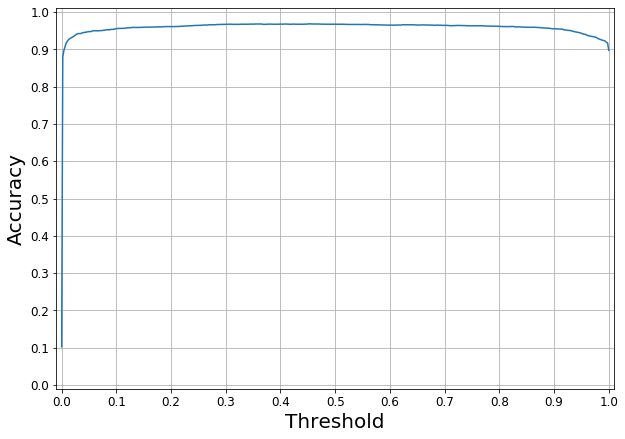

In [118]:
acc(y_proba, y_test, plot=True)

## F-Score
$ \text{F_score} = (1+\beta^2)\frac{precision*recall}{\beta^2*precision+recall} $ -> how many were correctly classifier

In [119]:
def f_score(y_proba, y_test, beta=.5, plot=True):
    f = []
    threshold = []
    for t in np.linspace(0,0.99,500):
        tn,fp,fn,tp = conf_matrix(y_proba, y_test, threshold=t, plot=False)
        f.append((1+beta**2)*(((tp)/(tp+fp))*(tp)/(tp+fn))/(beta**2*((tp)/(tp+fp))+(tp)/(tp+fn)))
        threshold.append(t)

    if plot:
        plot_metric_to_threshold(threshold, f, "F-Score")
        return
    return threshold, f

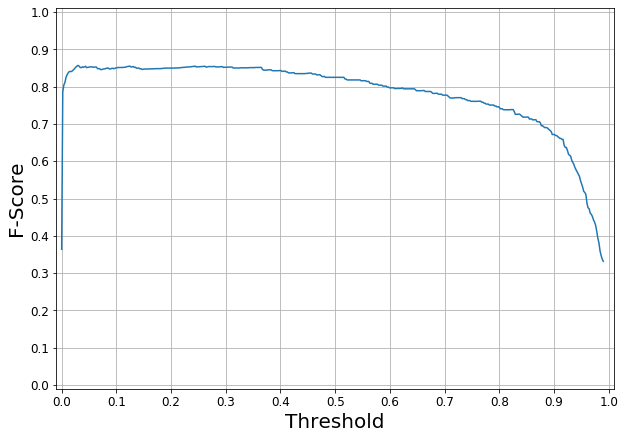

In [120]:
f_score(y_proba, y_test, beta=2, plot=True)

## ROC - AUC 

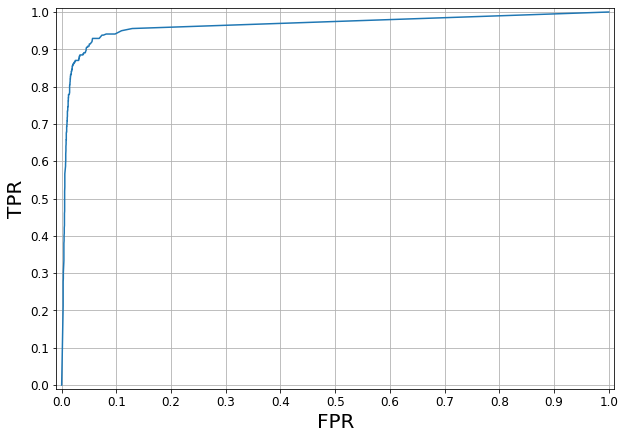

In [121]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(fpr(y_proba, y_test, plot=False)[1],tpr(y_proba, y_test, plot=False)[1])
        
ax.set_xticks(np.round(np.arange(0,1.1,0.1),1))
ax.set_yticks(np.round(np.arange(0,1.1,0.1),1))
        
ax.set_xticklabels(np.round(np.arange(0,1.1,0.1),1), size=12)
ax.set_yticklabels(np.round(np.arange(0,1.1,0.1),1), size=12)
ax.set_xlabel("FPR", fontsize=20)
ax.set_ylabel("TPR", fontsize=20)
        
ax.set_xlim([-0.01,1.01])
ax.set_ylim([-0.01,1.01])
plt.grid()
plt.show()

## Area Under "Precision - Recall" Curve

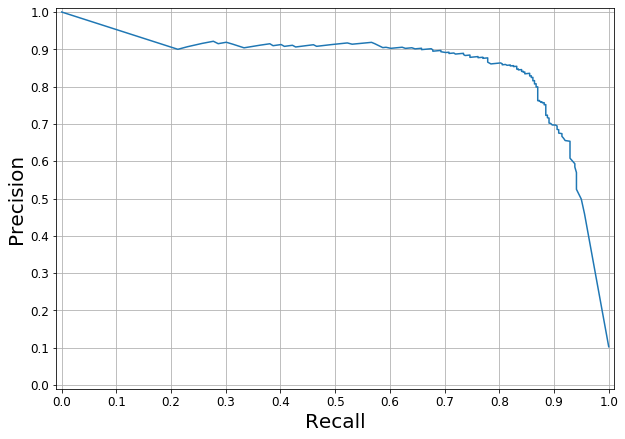

In [122]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(tpr(y_proba, y_test, plot=False)[1],ppv(y_proba, y_test, plot=False)[1])
        
ax.set_xticks(np.round(np.arange(0,1.1,0.1),1))
ax.set_yticks(np.round(np.arange(0,1.1,0.1),1))
        
ax.set_xticklabels(np.round(np.arange(0,1.1,0.1),1), size=12)
ax.set_yticklabels(np.round(np.arange(0,1.1,0.1),1), size=12)
ax.set_xlabel("Recall", fontsize=20)
ax.set_ylabel("Precision", fontsize=20)
        
ax.set_xlim([-0.01,1.01])
ax.set_ylim([-0.01,1.01])
plt.grid()
plt.show()